In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from matplotlib.pyplot import figure
sns.set()

In [2]:
df= pd.read_csv("coop_top_100_ 201908.csv", encoding="latin1", sep=";")

In [3]:
#transformar data em index de data
df['data'] = pd.to_datetime(df['data'], format="%Y%m")
#df.set_index("data",inplace=True, drop=True)

In [4]:
#Arrumar valores separados por virgula
df['valor']= df['valor'].str.replace(",", ".")
df['valor'] = pd.to_numeric(df['valor'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130368 entries, 0 to 130367
Data columns (total 5 columns):
data        130368 non-null datetime64[ns]
id_coop     130368 non-null int64
nome        130368 non-null object
variavel    130368 non-null object
valor       130368 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 5.0+ MB


In [6]:
df.head(13)

,data,id_coop,nome,variavel,valor
0,2000-01-01,75847,CECM MEDICOS E DEMAIS PROFISSIONAIS DA SAUDE D...,IF.DATA_Capt,4730352.04
1,2000-01-01,75847,CECM MEDICOS E DEMAIS PROFISSIONAIS DA SAUDE D...,IF.DATA_DCap,-55544.11
2,2000-01-01,75847,CECM MEDICOS E DEMAIS PROFISSIONAIS DA SAUDE D...,IF.DATA_JCP,0.00
3,2000-01-01,75847,CECM MEDICOS E DEMAIS PROFISSIONAIS DA SAUDE D...,IF.DATA_OpC,2309629.76
4,2000-01-01,75847,CECM MEDICOS E DEMAIS PROFISSIONAIS DA SAUDE D...,IF.DATA_PartLuc,0.00
5,2000-01-01,75847,CECM MEDICOS E DEMAIS PROFISSIONAIS DA SAUDE D...,IF.DATA_RdOC,71020.47
6,2000-01-01,815319,CCR DE VENDA NOVA DO IMIGRANTE - SICOOB VENDA ...,IF.DATA_Capt,12706802.94
7,2000-01-01,815319,CCR DE VENDA NOVA DO IMIGRANTE - SICOOB VENDA ...,IF.DATA_DCap,-160654.29
8,2000-01-01,815319,CCR DE VENDA NOVA DO IMIGRANTE - SICOOB VENDA ...,IF.DATA_JCP,0.00
9,2000-01-01,815319,CCR DE VENDA NOVA DO IMIGRANTE - SICOOB VENDA ...,IF.DATA_OpC,8912457.09


<h1 style="color: red">Quantidade Nomes Diferentes:</h1>

In [7]:
nomes = df['nome'].drop_duplicates().reset_index(drop=True)
nomes.count()
#nomes[1]

556

## Últimos Nomes

In [8]:
#df[['id_coop','nome']].drop_duplicates().reset_index(drop=True)
ultimos_nomes = df[df['data'].dt.year == 2019][['id_coop','nome']]
ultimos_nomes.drop_duplicates().count()

id_coop    111
nome       111
dtype: int64

<h1 style="color: red">Quantidade de Identificadores das IFs</h1>

In [9]:
ids= df['id_coop'].drop_duplicates().reset_index(drop=True)
ids.count()

100

In [10]:
par_nome_id_coop = df[['nome','id_coop']].drop_duplicates()
par_nome_id_coop[par_nome_id_coop['nome']== 'CECM DOS MEDICOS DE CHAPECO LTDA']
def get_id_coop(nome):
    id = par_nome_id_coop[par_nome_id_coop['nome']== nome]['id_coop']
    return id.values[0]
get_id_coop('CECM DOS MEDICOS DE CHAPECO LTDA')

1039011

<h1 style="color: red">Nossa conta vai levar em consideração a IF pelo nome (556) ou pelo identificador (100)
que eu imagino que seja o grupo?</h1>

<h1 style="color: red">Olha a quantidade de nomes diferentes por identificador:</h1>

[[]]

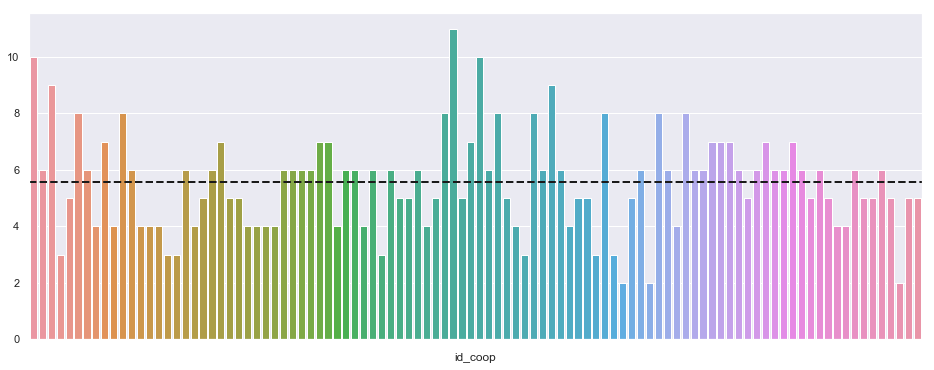

In [11]:
unique_names = df[['id_coop','nome']].drop_duplicates()
unique_names.sort_values(by=['id_coop'], inplace=True)
unique_names
#10 6 9 3
figure(figsize=(16, 6))
x = unique_names.groupby('id_coop').count().index
y = unique_names.groupby('id_coop').count().values.reshape(-1,)
g0=sns.barplot(x, y)
plt.axhline(y.mean(), color='k', linestyle='dashed', linewidth=2)
g0.set(xticklabels=[])

# Variáveis

In [12]:
df['variavel'].drop_duplicates()

0       IF.DATA_Capt
1       IF.DATA_DCap
2        IF.DATA_JCP
3        IF.DATA_OpC
4    IF.DATA_PartLuc
5       IF.DATA_RdOC
Name: variavel, dtype: object

<ul>
    <li>RdOC: Receitas com operações de crédito</li>
    <li>OpC: Operações de crédito</li>
    <li>Capt: Captações</li>
    <li>Dcap: Despesas de captação de crédito</li>
    <li>JCP: juro sobre capital próprio</li>
    <li>PartLuc: sobra líquida</li>
    <li style="color:red">OpCmed: média entre o mês no ano e o mesmo mês do ano anterior</li>
</ul>

<h1 style="color: red">Está correto dizer que a fórmula é a seguinte?</h1>

<h2 style="color:green">
$spread_{coop}=\left(\frac{RdOC_{t}}{\frac{OpC_{t}+OpC_{t-12}}{2}}\right)-
\left(\frac{DCap_{t}}{\frac{Capt_{t}+Capt_{t-12}}{2}}\right) - 
\left(\frac{PartLuc_{t} + JCP_{t}} 
{\frac {\left(\frac{OpC_{t} + OpC_{t - 12}}{2}\right)-\left(\frac{Capt_{t} + Capt_{t-12}}{2}\right)}{2}}\right)$
</h2>

<h1 style="color: red">Na imagem que tu tinhas mandado esse termo:
    $\left(
        \frac
            {SobraLiq_{i} + JCP_{t}}
            {
                \frac
                    {OpC_{med} - Capt_{med}}
                    {2}
            }
    \right)$<br>
    tem um 'i' que não deu pra entender o que é.
</h1>

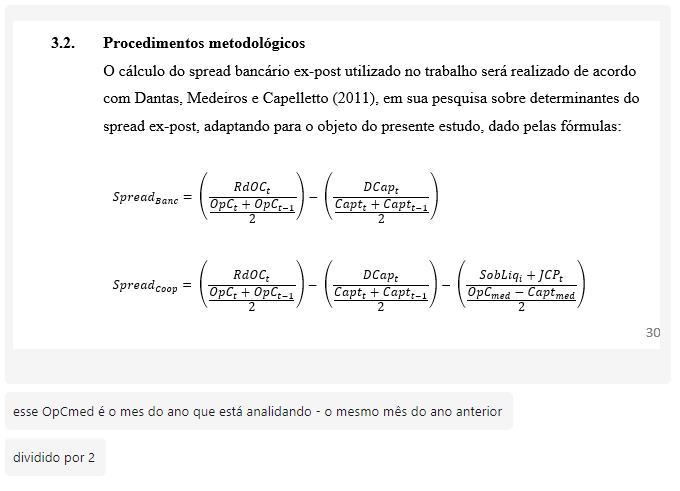

In [13]:
Image(filename='formula.png')

<h1 style="color: red">Pelo que eu entendi do teu comentário o termo $OpC_{med}$ e $Capt_{med}$ seriam:</h1>

<h1 style="color: green">$OpC_{med} = \frac{OpC_{t} + OpC_{t - 12}}{2}$<h1>

<h1 style="color: green">$Capt_{med}= \frac{Capt_{t} + Capt_{t-12}}{2}$</h1>

<h1 style="color: red">Já que se tratam de médias entre meses com um ano de diferença.</h1>

In [14]:
ids[0]

75847

In [15]:
df[df['id_coop']==ids[0]][['nome','id_coop']].drop_duplicates()

,nome,id_coop
0,CECM MEDICOS E DEMAIS PROFISSIONAIS DA SAUDE D...,75847
29130,COOPERATIVA DE ECONOMIA E CREDITO MUTUO DOS ME...,75847
31482,COOPERATIVA DE CRÃDITO DOS MÃDICOS E DEMAIS ...,75847
48534,COOPERATIVA DE CRÃDITO DOS MÃDICOS E DEMAIS ...,75847
50886,COOPERATIVA DE CRÃDITO DOS MÃDICOS E DEMAIS ...,75847
66690,"COOPERATIVA DE CRÃDITO DOS MÃDICOS, PROFISSI...",75847
76446,"COOPERATIVA DE CRÃDITO DOS MÃDICOS, PROFISSI...",75847
88026,"COOPERATIVA DE CRÃDITO DOS MÃDICOS, PROFISSI...",75847
106368,COOPERATIVA DE CRÃDITO UNICRED SUL CATARINENS...,75847
110568,COOPERATIVA DE CRÃDITO UNICRED SUL CATARINENS...,75847


# Pivot

In [16]:
pivot = df[df['nome']== nomes[0]].pivot(index='data', columns='variavel',values='valor')
pivot['OpC_off_1'] = pivot['IF.DATA_OpC'].shift(1)
pivot['OpC_off_12'] = pivot['IF.DATA_OpC'].shift(12)
pivot['Capt_off_1'] = pivot['IF.DATA_Capt'].shift(1)
pivot['Capt_off_12'] = pivot['IF.DATA_Capt'].shift(12)
pivot['taxApl'] = pivot['IF.DATA_RdOC'] / ((pivot['IF.DATA_OpC'] + pivot['OpC_off_1'])/2)
cols=['IF.DATA_DCap', 'IF.DATA_JCP','IF.DATA_PartLuc', 'IF.DATA_RdOC',
     'IF.DATA_OpC','OpC_off_1', 'OpC_off_12',
     'IF.DATA_Capt', 'Capt_off_1', 'Capt_off_12','taxApl']
pivot[cols]
pivot.groupby(pivot.index.year).sum()

variavel,IF.DATA_Capt,IF.DATA_DCap,IF.DATA_JCP,IF.DATA_OpC,IF.DATA_PartLuc,IF.DATA_RdOC,OpC_off_1,OpC_off_12,Capt_off_1,Capt_off_12,taxApl
data,,,,,,,,,,,
2000,7.166852e+07,-2573783.33,0.0,31039919.20,0.0,2986240.86,27865897.49,0.00,6.463906e+07,0.000000e+00,1.125104
2001,1.008993e+08,-3426029.57,0.0,38298726.33,0.0,3798965.78,36963040.13,31039919.20,9.849194e+07,7.166852e+07,1.169069
2002,1.261760e+08,-4449393.78,0.0,61425770.14,0.0,5934521.35,59779181.20,38298726.33,1.237981e+08,1.008993e+08,1.158480
2003,1.530570e+08,-7819413.34,0.0,68901479.02,0.0,7643681.03,69221786.77,61425770.14,1.523019e+08,1.261760e+08,1.339232
2004,2.605801e+07,-373802.67,0.0,11755862.00,0.0,407722.81,11596616.99,12124397.68,2.564359e+07,2.454879e+07,0.069688


## Pivot pelo nome

def pivot_IF(nome_IF):
    pivot = df[df['nome']== nome_IF].pivot(index='data', columns='variavel',values='valor')
    pivot['OpC_off_1'] = pivot['IF.DATA_OpC'].shift(1)
    pivot['OpC_off_12'] = pivot['IF.DATA_OpC'].shift(12)
    pivot['Capt_off_1'] = pivot['IF.DATA_Capt'].shift(1)
    pivot['Capt_off_12'] = pivot['IF.DATA_Capt'].shift(12)
    pivot['taxApl'] = pivot['IF.DATA_RdOC'] / ((pivot['IF.DATA_OpC'] + pivot['OpC_off_1'])/2)
    pivot['taxCapt'] = pivot['IF.DATA_DCap'] / ((pivot['IF.DATA_Capt'] + pivot['Capt_off_1'])/2)
    pivot['spread_banc'] = pivot['taxApl'] +  pivot['taxCapt'] # a captação tem sinal negativo
    cols=['spread_banc','taxApl','taxCapt','IF.DATA_DCap', 'IF.DATA_JCP','IF.DATA_PartLuc', 'IF.DATA_RdOC',
     'IF.DATA_OpC','OpC_off_1', 'OpC_off_12',
     'IF.DATA_Capt', 'Capt_off_1', 'Capt_off_12']
    return pivot[cols]
pivot_IF(nomes[0])

## Pivot pelo id

In [17]:
pd.Series([-1,-2,-3]).sum()

-6

<h2 style="color:green">
<p>t é o ano</p>
$spread_{coop}=\left(\frac{RdOC_{t}}{\frac{OpC_{t}+OpC_{t-1}}{2}}\right)-
\left(\frac{DCap_{t}}{\frac{Capt_{t}+Capt_{t-1}}{2}}\right) - 
\left(\frac{PartLuc_{t} + JCP_{t}} 
{\frac {\left(\frac{OpC_{t} + OpC_{t - 1}}{2}\right)-\left(\frac{Capt_{t} + Capt_{t-1}}{2}\right)}{2}}\right)$
</h2>

<h2 style="color:green">
<p>t é o ano</p>
$spread_{coop}=\left(\frac{RdOC_{t}}{\frac{OpC_{t}+OpC_{t-1}}{2}}\right)-
\left(\frac{DCap_{t}}{\frac{Capt_{t}+Capt_{t-1}}{2}}\right) - 
\left(\frac{PartLuc_{t} + JCP_{t}} 
{\lvert\left(\frac{OpC_{t} + OpC_{t - 1}}{2}\right)-\left(\frac{Capt_{t} + Capt_{t-1}}{2}\right)\rvert}\right)$
</h2>

<h2 style="color:green">
$
se \left(\frac{OpC_{t} + OpC_{t - 1}}{2}\right) > \left(\frac{Capt_{t} + Capt_{t-1}}{2}\right)
$
    <br><br>
$
\left(\frac{PartLuc_{t} + JCP_{t}}
{\frac {\left(\frac{OpC_{t} + OpC_{t - 1}}{2}\right)-\left(\frac{Capt_{t} + Capt_{t-1}}{2}\right)}{2}}\right)$
será negativo
    <br><br>
Do contrário, teremos um número positivo e, portanto, um spread na cooperativa menor que o cálculo do spread bancário.
</h2>

In [18]:
ids[0]

75847

$\lvert3\rvert$

In [19]:
abs(-2)

2

In [20]:
def pivot_IF(id):
    #print('este e o id: ')
    #print(id)
    pivot = df[df['id_coop']== id].pivot(index='data', columns='variavel',values='valor')
    pivot = pivot.groupby(pivot.index.year).sum()
    pivot['id'] = id
    pivot['OpC_off_1'] = pivot['IF.DATA_OpC'].shift(1)
    #pivot['OpC_off_12'] = pivot['IF.DATA_OpC'].shift(12)
    pivot['Capt_off_1'] = pivot['IF.DATA_Capt'].shift(1)
    #pivot['Capt_off_12'] = pivot['IF.DATA_Capt'].shift(12)
    pivot['taxApl'] = pivot['IF.DATA_RdOC'] / ((pivot['IF.DATA_OpC'] + pivot['OpC_off_1'])/2)
    pivot['taxCapt'] = pivot['IF.DATA_DCap'] / ((pivot['IF.DATA_Capt'] + pivot['Capt_off_1'])/2)
    pivot['spread_banc'] = pivot['taxApl'] +  pivot['taxCapt'] # a captação tem sinal negativo
    pivot['termo_coop'] = \
    (
        (pivot['IF.DATA_PartLuc'] + pivot['IF.DATA_JCP']) / 
        abs(
            (
                (
                    (pivot['IF.DATA_OpC'] + pivot['OpC_off_1'])
                    / 2 
                ) -
                (
                    (pivot['IF.DATA_Capt'] + pivot['Capt_off_1'])
                    / 2 
                )
            )          
        )
    )
    # termo coop é negativo se a media de operações de crédito for maior que
    # a média de captação
    pivot['spread_coop'] = pivot['spread_banc'] + pivot['termo_coop'] 
    cols=['id','spread_banc', 'termo_coop','spread_coop','taxApl','taxCapt','IF.DATA_DCap', 'IF.DATA_JCP','IF.DATA_PartLuc', 'IF.DATA_RdOC',
     'IF.DATA_OpC','OpC_off_1', 'IF.DATA_Capt', 'Capt_off_1']
    return pivot[cols]
pivot_IF(ids[0])

variavel,id,spread_banc,termo_coop,spread_coop,taxApl,taxCapt,IF.DATA_DCap,IF.DATA_JCP,IF.DATA_PartLuc,IF.DATA_RdOC,IF.DATA_OpC,OpC_off_1,IF.DATA_Capt,Capt_off_1
data,,,,,,,,,,,,,,
2000,75847,NaN,NaN,NaN,NaN,NaN,-2.573783e+06,0.00,0.0,2.986241e+06,3.103992e+07,NaN,7.166852e+07,NaN
2001,75847,0.069871,0.000000,0.069871,0.109577,-0.039706,-3.426030e+06,0.00,0.0,3.798966e+06,3.829873e+07,3.103992e+07,1.008993e+08,7.166852e+07
2002,75847,0.079830,0.000000,0.079830,0.119018,-0.039189,-4.449394e+06,0.00,0.0,5.934521e+06,6.142577e+07,3.829873e+07,1.261760e+08,1.008993e+08
2003,75847,0.061293,0.000000,0.061293,0.117300,-0.056006,-7.819413e+06,0.00,0.0,7.643681e+06,6.890148e+07,6.142577e+07,1.530570e+08,1.261760e+08
2004,75847,0.052414,0.000000,0.052414,0.087608,-0.035194,-5.576807e+06,0.00,0.0,6.527201e+06,8.010740e+07,6.890148e+07,1.638574e+08,1.530570e+08
2005,75847,0.053521,0.000000,0.053521,0.096436,-0.042915,-7.998333e+06,0.00,0.0,9.056384e+06,1.077142e+08,8.010740e+07,2.088969e+08,1.638574e+08
2006,75847,0.059579,0.000000,0.059579,0.095584,-0.036005,-8.322780e+06,0.00,0.0,1.293196e+07,1.628732e+08,1.077142e+08,2.534147e+08,2.088969e+08
2007,75847,0.048201,0.000000,0.048201,0.076203,-0.028002,-7.739358e+06,0.00,0.0,1.557158e+07,2.458143e+08,1.628732e+08,2.993509e+08,2.534147e+08
2008,75847,0.050248,0.000000,0.050248,0.085238,-0.034991,-1.526630e+07,0.00,0.0,3.239877e+07,5.143773e+08,2.458143e+08,5.732451e+08,2.993509e+08


In [21]:
test_if = pivot_IF(ids[1])
test_if.columns

Index(['id', 'spread_banc', 'termo_coop', 'spread_coop', 'taxApl', 'taxCapt',
       'IF.DATA_DCap', 'IF.DATA_JCP', 'IF.DATA_PartLuc', 'IF.DATA_RdOC',
       'IF.DATA_OpC', 'OpC_off_1', 'IF.DATA_Capt', 'Capt_off_1'],
      dtype='object', name='variavel')

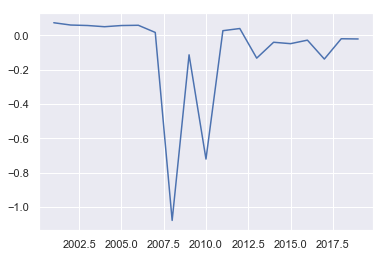

In [22]:
plt.plot(test_if.index, test_if['spread_coop'])

In [23]:
def monta_csv():
    cols=['id','spread_banc', 'termo_coop','spread_coop','taxApl',
          'taxCapt','IF.DATA_DCap', 'IF.DATA_JCP','IF.DATA_PartLuc', 'IF.DATA_RdOC',
     'IF.DATA_OpC','OpC_off_1', 'IF.DATA_Capt', 'Capt_off_1']
    total = pd.DataFrame(columns=cols)
    for n in ids:
        total = total.append(pivot_IF(n))
    return total
completo = monta_csv()
#completo.to_csv("arrumado.csv", encoding="latin1", sep=";")

In [24]:
ids.count()

100

In [25]:
len(completo['id'].unique())

100

In [26]:
completo[completo['id']== ids[0]]

variavel,id,spread_banc,termo_coop,spread_coop,taxApl,taxCapt,IF.DATA_DCap,IF.DATA_JCP,IF.DATA_PartLuc,IF.DATA_RdOC,IF.DATA_OpC,OpC_off_1,IF.DATA_Capt,Capt_off_1
2000,75847,NaN,NaN,NaN,NaN,NaN,-2.573783e+06,0.00,0.0,2.986241e+06,3.103992e+07,NaN,7.166852e+07,NaN
2001,75847,0.069871,0.000000,0.069871,0.109577,-0.039706,-3.426030e+06,0.00,0.0,3.798966e+06,3.829873e+07,3.103992e+07,1.008993e+08,7.166852e+07
2002,75847,0.079830,0.000000,0.079830,0.119018,-0.039189,-4.449394e+06,0.00,0.0,5.934521e+06,6.142577e+07,3.829873e+07,1.261760e+08,1.008993e+08
2003,75847,0.061293,0.000000,0.061293,0.117300,-0.056006,-7.819413e+06,0.00,0.0,7.643681e+06,6.890148e+07,6.142577e+07,1.530570e+08,1.261760e+08
2004,75847,0.052414,0.000000,0.052414,0.087608,-0.035194,-5.576807e+06,0.00,0.0,6.527201e+06,8.010740e+07,6.890148e+07,1.638574e+08,1.530570e+08
2005,75847,0.053521,0.000000,0.053521,0.096436,-0.042915,-7.998333e+06,0.00,0.0,9.056384e+06,1.077142e+08,8.010740e+07,2.088969e+08,1.638574e+08
2006,75847,0.059579,0.000000,0.059579,0.095584,-0.036005,-8.322780e+06,0.00,0.0,1.293196e+07,1.628732e+08,1.077142e+08,2.534147e+08,2.088969e+08
2007,75847,0.048201,0.000000,0.048201,0.076203,-0.028002,-7.739358e+06,0.00,0.0,1.557158e+07,2.458143e+08,1.628732e+08,2.993509e+08,2.534147e+08
2008,75847,0.050248,0.000000,0.050248,0.085238,-0.034991,-1.526630e+07,0.00,0.0,3.239877e+07,5.143773e+08,2.458143e+08,5.732451e+08,2.993509e+08
2009,75847,0.032262,0.000000,0.032262,0.051590,-0.019328,-8.321428e+06,0.00,0.0,2.046403e+07,2.789630e+08,5.143773e+08,2.878481e+08,5.732451e+08


In [36]:
completo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 2000 to 2019
Data columns (total 14 columns):
id                 1980 non-null object
spread_banc        1880 non-null float64
termo_coop         1880 non-null float64
spread_coop        1880 non-null float64
taxApl             1880 non-null float64
taxCapt            1880 non-null float64
IF.DATA_DCap       1980 non-null float64
IF.DATA_JCP        1980 non-null float64
IF.DATA_PartLuc    1980 non-null float64
IF.DATA_RdOC       1980 non-null float64
IF.DATA_OpC        1980 non-null float64
OpC_off_1          1880 non-null float64
IF.DATA_Capt       1980 non-null float64
Capt_off_1         1880 non-null float64
dtypes: float64(13), object(1)
memory usage: 232.0+ KB


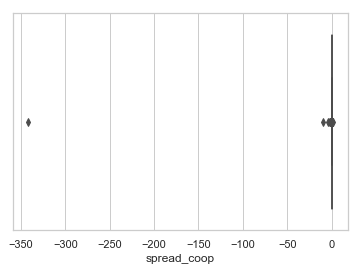

In [37]:
sns.boxplot(completo.spread_coop)

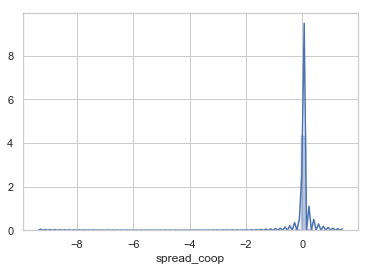

In [38]:
sns.distplot(completo[completo.spread_coop > -200].spread_coop)

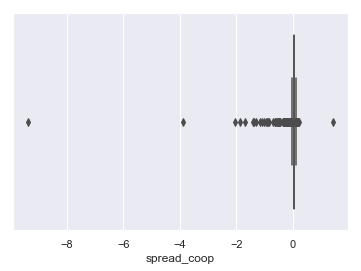

In [30]:
sns.boxplot(completo[completo.spread_coop > -200].spread_coop)

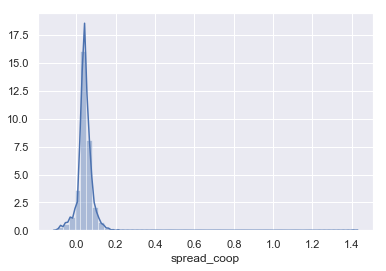

In [31]:
sns.distplot(completo[completo.spread_coop > -0.1].spread_coop)

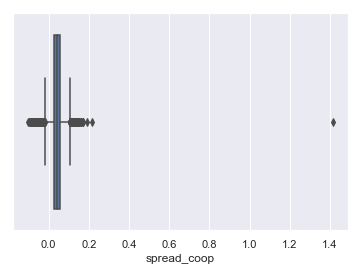

In [32]:
sns.boxplot(completo[completo.spread_coop > -0.1].spread_coop)

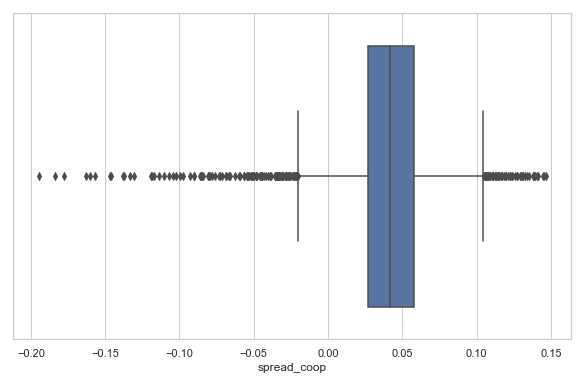

In [39]:
fig = plt.gcf()
fig.set_size_inches(10, 6)
sns.set_style("whitegrid")
sns.boxplot(completo[(completo.spread_coop > -0.2) & (completo.spread_coop < 0.15)].spread_coop)

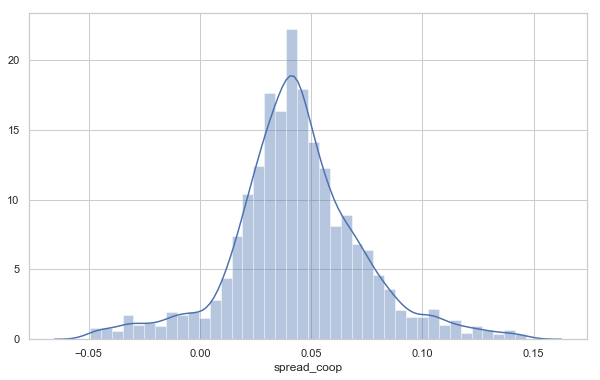

In [40]:
fig = plt.gcf()
fig.set_size_inches(10, 6)
sns.set_style("whitegrid")
sns.distplot(completo[(completo.spread_coop > -0.05) & (completo.spread_coop < 0.15)].spread_coop)

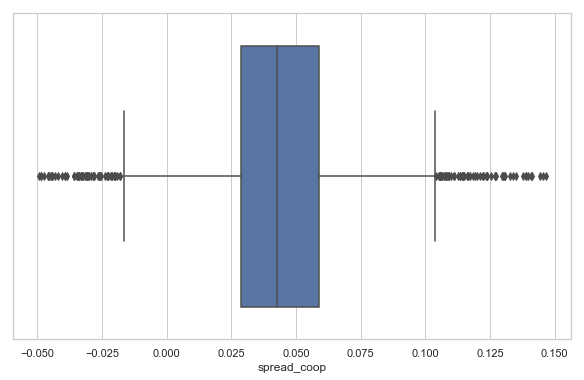

In [42]:
fig = plt.gcf()
fig.set_size_inches(10, 6)
sns.set_style("whitegrid")
sns.boxplot(completo[(completo.spread_coop > -0.05) & (completo.spread_coop < 0.15)].spread_coop)

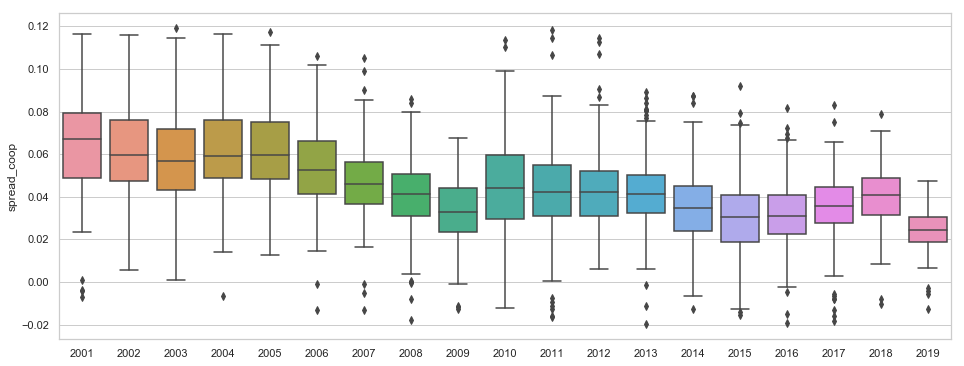

In [52]:
fig = plt.gcf()
fig.set_size_inches(16, 6)
sns.set_style("whitegrid")
filtrado = completo[(completo.spread_coop > -0.02) & (completo.spread_coop < 0.12)]
sns.boxplot(filtrado.index, filtrado.spread_coop)

In [53]:
filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1681 entries, 2001 to 2018
Data columns (total 14 columns):
id                 1681 non-null object
spread_banc        1681 non-null float64
termo_coop         1681 non-null float64
spread_coop        1681 non-null float64
taxApl             1681 non-null float64
taxCapt            1681 non-null float64
IF.DATA_DCap       1681 non-null float64
IF.DATA_JCP        1681 non-null float64
IF.DATA_PartLuc    1681 non-null float64
IF.DATA_RdOC       1681 non-null float64
IF.DATA_OpC        1681 non-null float64
OpC_off_1          1681 non-null float64
IF.DATA_Capt       1681 non-null float64
Capt_off_1         1681 non-null float64
dtypes: float64(13), object(1)
memory usage: 237.0+ KB


In [59]:
filtrado.head(20)

variavel,id,spread_banc,termo_coop,spread_coop,taxApl,taxCapt,IF.DATA_DCap,IF.DATA_JCP,IF.DATA_PartLuc,IF.DATA_RdOC,IF.DATA_OpC,OpC_off_1,IF.DATA_Capt,Capt_off_1
2001,75847,0.069871,0.000000,0.069871,0.109577,-0.039706,-3.426030e+06,0.00,0.0,3.798966e+06,3.829873e+07,3.103992e+07,1.008993e+08,7.166852e+07
2002,75847,0.079830,0.000000,0.079830,0.119018,-0.039189,-4.449394e+06,0.00,0.0,5.934521e+06,6.142577e+07,3.829873e+07,1.261760e+08,1.008993e+08
2003,75847,0.061293,0.000000,0.061293,0.117300,-0.056006,-7.819413e+06,0.00,0.0,7.643681e+06,6.890148e+07,6.142577e+07,1.530570e+08,1.261760e+08
2004,75847,0.052414,0.000000,0.052414,0.087608,-0.035194,-5.576807e+06,0.00,0.0,6.527201e+06,8.010740e+07,6.890148e+07,1.638574e+08,1.530570e+08
2005,75847,0.053521,0.000000,0.053521,0.096436,-0.042915,-7.998333e+06,0.00,0.0,9.056384e+06,1.077142e+08,8.010740e+07,2.088969e+08,1.638574e+08
2006,75847,0.059579,0.000000,0.059579,0.095584,-0.036005,-8.322780e+06,0.00,0.0,1.293196e+07,1.628732e+08,1.077142e+08,2.534147e+08,2.088969e+08
2007,75847,0.048201,0.000000,0.048201,0.076203,-0.028002,-7.739358e+06,0.00,0.0,1.557158e+07,2.458143e+08,1.628732e+08,2.993509e+08,2.534147e+08
2008,75847,0.050248,0.000000,0.050248,0.085238,-0.034991,-1.526630e+07,0.00,0.0,3.239877e+07,5.143773e+08,2.458143e+08,5.732451e+08,2.993509e+08
2009,75847,0.032262,0.000000,0.032262,0.051590,-0.019328,-8.321428e+06,0.00,0.0,2.046403e+07,2.789630e+08,5.143773e+08,2.878481e+08,5.732451e+08
2010,75847,0.048810,0.000000,0.048810,0.081084,-0.032275,-1.099237e+07,0.00,0.0,2.594159e+07,3.609027e+08,2.789630e+08,3.933232e+08,2.878481e+08


In [57]:
fil_mean = filtrado.groupby(filtrado.index).mean()


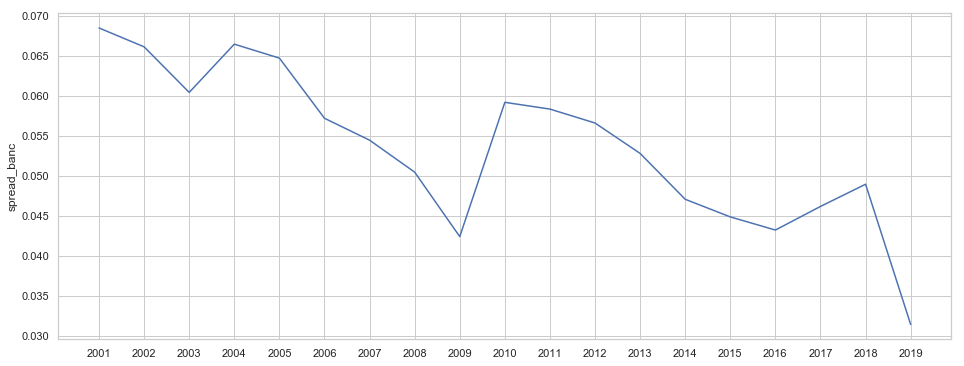

In [58]:
fig = plt.gcf()
fig.set_size_inches(16, 6)
sns.set_style("whitegrid")
sns.lineplot(fil_mean.index.map(str), fil_mean.spread_banc)